Epoch 1/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.4382 - accuracy: 0.8600 - val_loss: 0.0853 - val_accuracy: 0.9716
Epoch 2/15
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1774 - accuracy: 0.9469 - val_loss: 0.0775 - val_accuracy: 0.9756
Epoch 3/15
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1364 - accuracy: 0.9598 - val_loss: 0.0669 - val_accuracy: 0.9797
Epoch 4/15
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1211 - accuracy: 0.9647 - val_loss: 0.0491 - val_accuracy: 0.9858
Epoch 5/15
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1065 - accuracy: 0.9692 - val_loss: 0.0456 - val_accuracy: 0.9866
Epoch 6/15
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0994 - accuracy: 0.9706 - val_loss: 0.0485 - val_accuracy: 0.9859
Epoch 7/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0930 - accuracy: 0.9722 - val_loss: 0.0418 -

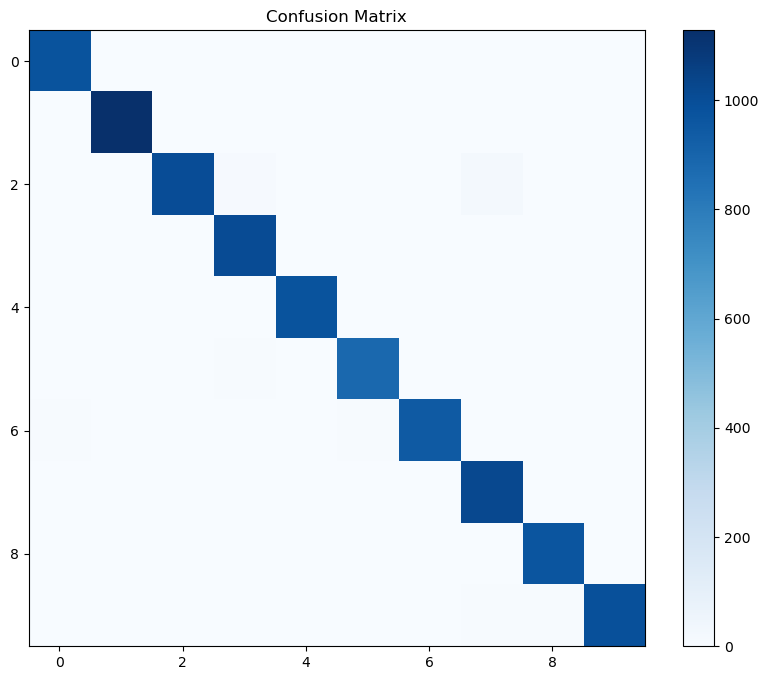

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Ensure matplotlib inline mode is enabled
%matplotlib inline

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Download and load the dataset
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to fit the model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=15, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the values from the validation dataset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
print(classification_report(y_test, y_pred_classes))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


In [5]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
# Assuming you have trained your model and it is stored in the variable `model`
model.save('hand_gesture_model.h5')


In [ ]:
import cv2

# Function to test if a webcam index is working
def test_webcam(index):
    cap = cv2.VideoCapture(index)
    if not cap.isOpened():
        print(f"Webcam with index {index} cannot be opened.")
        return False
    print(f"Webcam with index {index} is opened.")
    cap.release()
    return True

# Initialize working_index with a default invalid value
working_index = -1

# Check multiple webcam indices
for index in range(5):  # Check the first 5 indices
    if test_webcam(index):
        working_index = index
        break

if working_index == -1:
    print("Error: Could not open any webcam.")
    exit()

# Open the working webcam
cap = cv2.VideoCapture(working_index)
print(f"Using webcam with index {working_index}")

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture image")
        break

    cv2.imshow('Webcam Test', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Webcam with index 0 is opened.
Using webcam with index 0


In [ ]:
# Function to preprocess the frame
def preprocess_frame(frame):
    # Resize the frame to match the input size of the model
    resized_frame = cv2.resize(frame, (28, 28))  # Adjust the size if your model requires a different input size
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if necessary
    normalized_frame = gray_frame / 255.0  # Normalize pixel values
    reshaped_frame = np.reshape(normalized_frame, (1, 28, 28, 1))  # Adjust the shape if your model requires a different input shape
    return reshaped_frame


In [ ]:
# Make predictions
predictions = model.predict(preprocessed_frame)
predicted_label = labels[np.argmax(predictions)]

# Display the result on the frame
cv2.putText(frame, f'Gesture: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Display the frame in Jupyter Lab
display_frame(frame)


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('hand_gesture_model.h5')

# Define the labels (adjust based on your model's output)
labels = ['Label1', 'Label2', 'Label3', ..., 'LabelN']

# Function to preprocess the frame
def preprocess_frame(frame):
    # Resize the frame to match the input size of the model
    resized_frame = cv2.resize(frame, (28, 28))  # Adjust the size if your model requires a different input size
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if necessary
    normalized_frame = gray_frame / 255.0  # Normalize pixel values
    reshaped_frame = np.reshape(normalized_frame, (1, 28, 28, 1))  # Adjust the shape if your model requires a different input shape
    return reshaped_frame

# Function to display the frame in Jupyter Lab
def display_frame(frame):
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
    plt.axis('off')
    plt.show()

# Open the working webcam
cap = cv2.VideoCapture(0)  # Use index 0 for the integrated webcam

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to capture image")
        break

    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)

    # Make predictions
    predictions = model.predict(preprocessed_frame)
    predicted_label = labels[np.argmax(predictions)]

    # Display the result on the frame
    cv2.putText(frame, f'Gesture: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the frame in Jupyter Lab
    display_frame(frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

import cv2
import numpy as np

# Define the labels for your hand gestures (replace with your labels)
labels = ['Fist', 'Open Palm', 'Thumbs Up', 'Pointing Finger']

# Function to detect the hand region in the frame (replace with OpenCV or MediaPipe implementation)
def detect_hand(frame):
  # Implement hand detection logic using OpenCV or MediaPipe
  # This function should return the hand region (bounding box or mask) in the frame
  pass

# Function to preprocess the hand region (adjust based on your model's input)
def preprocess_frame(hand_region):
  # Resize the hand region to match your model's input size
  resized_frame = cv2.resize(hand_region, (X, Y))  # Replace X, Y with your model's input size
  # Convert to grayscale if necessary (adjust based on your model)
  gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
  # Normalize pixel values (typical range 0-1)
  normalized_frame = gray_frame / 255.0
  return normalized_frame

# Load your trained hand gesture recognition model (replace with your model loading logic)
model = cv2.dnn.readNetFromTensorflow('hand_gesture_model.h5')  # Assuming a TensorFlow model

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
  ret, frame = cap.read()
  
  if not ret:
    print("Failed to capture image")
    break

  # Detect the hand region in the frame
  hand_region = detect_hand(frame)
  
  # Preprocess the hand region
  preprocessed_frame = preprocess_frame(hand_region)

  # Make prediction using the model (replace with your model prediction logic)
  predictions = model.predict(np.expand_dims(preprocessed_frame, axis=0))
  predicted_label = labels[np.argmax(predictions)]

  # Display the predicted gesture on the frame
  cv2.putText(frame, f'Gesture: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

  cv2.imshow('Hand Gesture Recognition', frame)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()
